In [1]:
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

sys.path.append("../")

from fwc2.utils import preprocess

In [10]:
import torch
from fwc2.model import MLP
from torchmetrics.classification import Accuracy, MulticlassConfusionMatrix 

encoder = MLP(input_dim=32, hidden_dims=[64, 128, 64])
classifier = MLP(input_dim=64, hidden_dims=[32, 5])

batch = torch.randn(32, 32)

logits = encoder(batch)

print(f'shape of logits = {logits.shape}')

logits = classifier(logits)

print(f'shape of logits = {logits.shape}')

# y = torch.randn(32)
# 
# y.shape

y_pred = torch.argmax(logits, dim=1)
y_pred

shape of logits = torch.Size([32, 64])
shape of logits = torch.Size([32, 5])


tensor([4, 3, 4, 2, 4, 3, 2, 2, 3, 4, 2, 3, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2,
        2, 4, 4, 4, 2, 4, 3, 4])

In [11]:
RANDOM_STATE=42

for dataset in ['dapt20','scvic-apt-2021','mscad']:
    data = pd.read_csv(f'../datasets/{dataset}/all.csv')
    data = preprocess(data, pretraing=False)
    features, targets = data.drop(columns=['label']), data['label']
    
    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    
    encoder = LabelEncoder()
    targets = encoder.fit_transform(targets)
    
    print(encoder.classes_)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=RANDOM_STATE, stratify=targets)
    
    m = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
    m.fit(X_train, y_train)
    
    y_pred = m.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'-----------------{dataset}---------------------')
    print('Results of LR')
    print(f"F1 Score (macro): {f1}")
    print(f"F1 Score (weighted): {f1_weighted}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"precision: {precision}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # m = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=RANDOM_STATE)
    # m.fit(X_train, y_train)
    # y_pred = m.predict(X_test)
    # 
    # f1 = f1_score(y_test, y_pred, average='macro')
    # accuracy = accuracy_score(y_test, y_pred)
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # 
    # print(f'Results of MLP on {dataset}')
    # print(f"F1 Score (weighted): {f1}")
    # print(f"Accuracy: {accuracy}")
    # print("Confusion Matrix:")
    # print(conf_matrix)

shape = (82577, 77)
['benign' 'data exfiltration' 'establish foothold' 'lateral movement'
 'reconnaissance']


C:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


-----------------dapt20---------------------
Results of LR
F1 Score (macro): 0.4900676399057381
F1 Score (weighted): 0.8779230761477849
Accuracy: 0.8802373456042626
Recall: 0.8802373456042626
precision: 0.8786905862890275
Confusion Matrix:
[[11624     0   162     0   597]
 [    1     0     0     0     2]
 [  238     0  1461     0    22]
 [   19     0     1     1     6]
 [  588     0   342     0  1452]]
shape = (313238, 77)
['dataexfiltration' 'initialcompromise' 'lateralmovement' 'normaltraffic'
 'pivoting' 'reconnaissance']
-----------------scvic-apt-2021---------------------
Results of LR
F1 Score (macro): 0.7258582905594535
F1 Score (weighted): 0.9949778725821264
Accuracy: 0.9952113395479505
Recall: 0.9952113395479505
precision: 0.994993575161262
Confusion Matrix:
[[   45     0    11     8    41    15]
 [    0    17     0     7     2     4]
 [    1     1   105    21    34    12]
 [    2     3     7 61579     4    16]
 [   17     2    12     9   436    20]
 [    1     1     7    17  

C:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

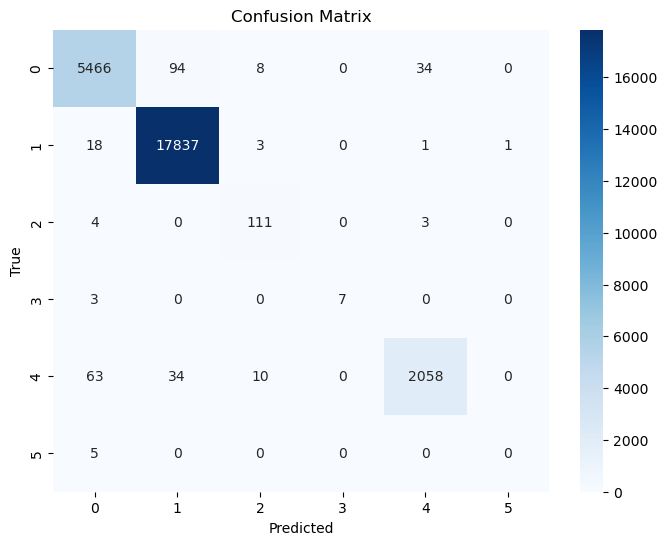

In [4]:
plot_confusion_matrix(conf_matrix)

In [8]:
for dataset in ['dapt20','scvic-apt-2021','mscad']:
    data = pd.read_csv(f'../datasets/{dataset}/all.csv')
    data = preprocess(data, pretraing=False)
    print(data.label.value_counts() / len(data) * 100)

shape = (82577, 77)
label
benign                74.974872
reconnaissance        14.421691
establish foothold    10.419366
lateral movement       0.165906
data exfiltration      0.018165
Name: count, dtype: float64
shape = (313238, 77)
label
normaltraffic        98.344390
pivoting              0.792369
reconnaissance        0.346063
lateralmovement       0.277425
dataexfiltration      0.191867
initialcompromise     0.047887
Name: count, dtype: float64
shape = (128799, 67)
label
brute_force    68.713266
benign         22.129054
port_scan       8.603328
http_ddos       0.497675
icmp_flood      0.034938
web_crwling     0.021739
Name: count, dtype: float64
